In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

seed = 123

In [116]:
def plot_variance(estimator):
  x = [0] + list(range(1, len(estimator.components_) + 1))
  y = [0] + list(np.cumsum(estimator.explained_variance_ratio_))
  plt.plot(x, y)
  plt.axhline(1, c='r', linestyle='--')
  plt.xlabel('Dimensions')
  plt.ylabel('Explained variance')

In [117]:
def plot_reduction(X_transformed, estimator, dim=2, y=None, label=None):
  fig = plt.figure(figsize=(9,6))
  if dim==2:
    ax = fig.add_subplot()
  else:
    ax = fig.add_subplot(projection='3d')
  if y is None:
    ax.scatter(*X_transformed[:,:dim].T, alpha=0.2)
  else:
    sc = ax.scatter(*X_transformed[:,:dim].T, c=y, cmap='jet', alpha=0.2)
    if label is None:
      plt.colorbar(sc)
    else:
      plt.colorbar(sc, label=label)
  preserved_variance = np.sum(estimator.explained_variance_ratio_[:dim])
  ax.set_title(f'{dim}-Dimensional PCA reduction\nPreserved variance : {preserved_variance:.2f}')

## Ex. 1: Swiss Roll

In [118]:
from sklearn.datasets import make_swiss_roll
swiss_roll = make_swiss_roll(10000, random_state=seed)[0]   # generate the synthetic dataset

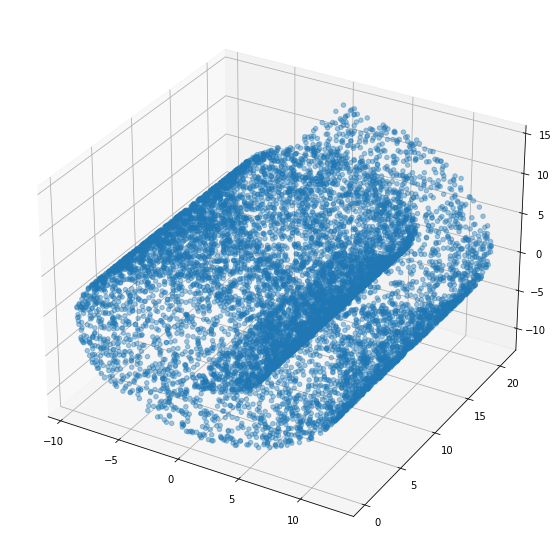

In [119]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(*swiss_roll.T, alpha=0.4)
plt.show()

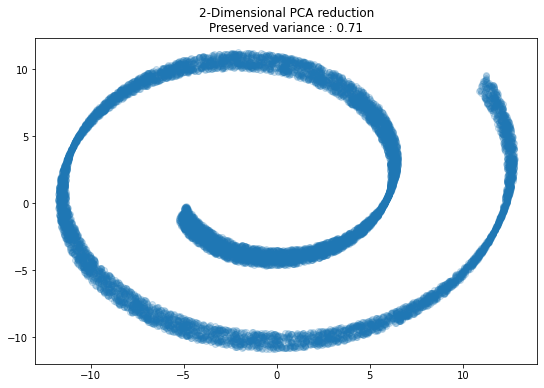

In [120]:
pca = PCA()
pca.fit(swiss_roll)
plot_reduction(pca.transform(swiss_roll), pca)

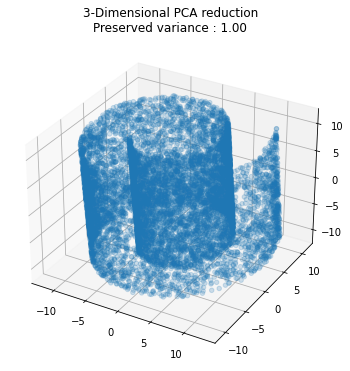

In [121]:
plot_reduction(pca.transform(swiss_roll), pca, 3)

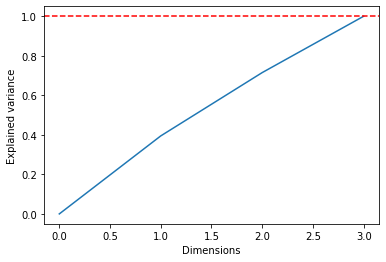

In [122]:
plot_variance(pca)

## Ex. 2: housing dataset

In [124]:
#cargar datos desde drive acceso libre
FILEID = "1vrk5heTgxMBZagbw62SSVSWvfrW--Jgz"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2023-03-22 16:00:06--  https://docs.google.com/uc?export=download&confirm=&id=1vrk5heTgxMBZagbw62SSVSWvfrW--Jgz
Resolving docs.google.com (docs.google.com)... 142.251.163.102, 142.251.163.113, 142.251.163.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.163.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/il5np6uclrfejvq7j28m2ivrj3dpr0ed/1679500800000/09173029842254050324/*/1vrk5heTgxMBZagbw62SSVSWvfrW--Jgz?e=download&uuid=fe1718ec-cb50-4bf0-8f9e-8deb2c339ffb [following]
--2023-03-22 16:00:35--  https://doc-0g-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/il5np6uclrfejvq7j28m2ivrj3dpr0ed/1679500800000/09173029842254050324/*/1vrk5heTgxMBZagbw62SSVSWvfrW--Jgz?e=download&uuid=fe1718ec-cb50-4bf0-8f9e-8deb2c339ffb
Resolving doc-0g-0s-docs.googleusercontent.com (doc-0g-0s-docs.googleusercontent.com)... 142.251.111.1

In [125]:
housing = pd.read_csv('datasets/housing/housing.csv')
housing.drop(columns=['ocean_proximity'], inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [126]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [127]:
# housing.sort_values(by='median_house_value', inplace=True)
X_housing, y_housing = housing.iloc[:,:-1], housing.iloc[:, -1]
pipe_housing = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('scaler', StandardScaler()),
                         ('pca', PCA())])
pipe_housing.fit(X_housing)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('pca', PCA())])

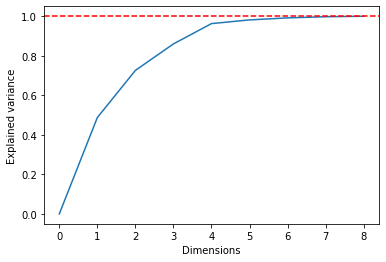

In [128]:
plot_variance(pipe_housing['pca'])

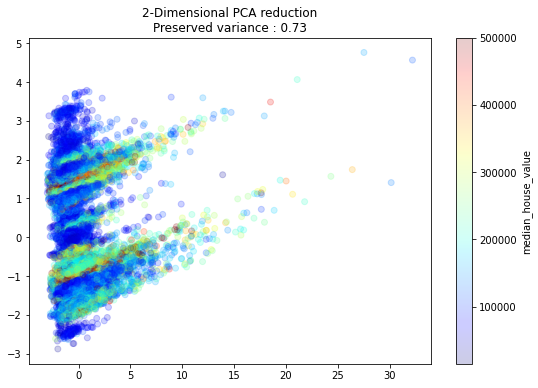

In [129]:
plot_reduction(pipe_housing.transform(X_housing), pipe_housing['pca'], 2, y_housing, 'median_house_value')

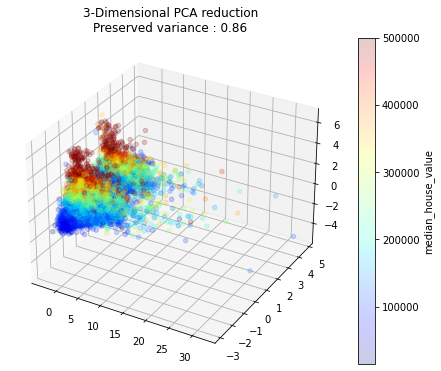

In [130]:
plot_reduction(pipe_housing.transform(X_housing), pipe_housing['pca'], 3, y_housing, 'median_house_value')

## Ex. 3: fifa19

In [131]:
fifa = pd.read_csv('datasets/data_fifa19.csv')
col_drop = ['Unnamed: 0', 'Name','ID','Photo','Flag', 'Club Logo','Loaned From',
            'Nationality','Club','Body Type','Position','Preferred Foot',
            'Work Rate','Real Face','Contract Valid Until', 'Joined']
fifa.drop(columns=col_drop, inplace=True)
X_fifa, y_fifa = fifa.iloc[:,:-1], fifa.iloc[:, -1]

In [132]:
 #codificar variables moneda
def code_euro(y):
    yc = np.zeros(y.shape[0])
    for i in range(y.shape[0]):
        if y[i][-1]=='M': yc[i] = float(y[i][1:-1])*10**6 #buscar M y reemplazar 10^6
        elif y[i][-1]=='K': yc[i] = float(y[i][1:-1])*10**3 # buscar K y reemplazar por 10^3
        else: yc[i] = float(y[i][1:])
    return yc 

#codificar estadísticas
def code_stats(y):
    yc = np.zeros(y.shape[0])
    for i in range(y.shape[0]):
        if y.iloc[i].find("+") > -1: # encontrar signo + en str y casteo a flotante
            yc[i] = float(y.iloc[i][:y.iloc[i].find("+")])+float(y.iloc[i][y.iloc[i].find("+")+1:])
        else: yc[i] = float(y.iloc[i])
    return yc  

In [133]:
y_fifa

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
          ...   
18202      €143K
18203      €113K
18204      €165K
18205      €143K
18206      €165K
Name: Release Clause, Length: 18207, dtype: object

In [134]:
imputer = SimpleImputer(strategy='most_frequent')
y_fifa = imputer.fit_transform(pd.DataFrame(y_fifa)).reshape(-1)
y_fifa = code_euro(y_fifa)

In [135]:
from sklearn.base import BaseEstimator, TransformerMixin #objetos básicos para herencia de clase

class mypre_fifa(BaseEstimator,TransformerMixin):
    #inicializacion de clase y varaibles
    def __init__(self, col_euro,col_stats): #constructor clase
        self.col_euro = col_euro #lista atributos tipo moneda
        self.col_stats = col_stats #lista atributos tipo estadistica

    def fit(self,X, *_):#función de ajuste -> *_ para indicar que puede recibir más entradas en el pipeline
        Xi = X.copy() #copiar dataset para no reemplazar original
        self.imputer_num = SimpleImputer(strategy="most_frequent") #crear imputador tipo moda
        self.a = Xi.columns[np.sum(Xi.isna())> 0] #encontrar columnas con datos faltantes
        self.imputer_num.fit(Xi[self.a]) # ajustar imputador
        Xi[self.a] = self.imputer_num.transform(Xi[self.a]) #evaluar datos con el imputador
        
        for i in self.col_euro: #codificar tipo moneda
            Xi[i] = code_euro(np.array(Xi[i]))
        
        for i in self.col_stats: #codificar datos estadisticos
            Xi[i] = code_stats(Xi[i])
        
        #height, wieght corregir formato
        Xi['Height'].replace(regex=["'"], value='.',inplace=True) #reemplaza unidad ' con .       
        for i in Xi.index:
            Xi.loc[i,'Weight'] = float(Xi.loc[i,'Weight'][:-3])#elimnar unidades 
            Xi.loc[i,'Height'] = float(Xi.loc[i,'Height'])#eliminar unidades
        
        Xi['Height'] = Xi['Height'].astype('float64')
        Xi['Weight'] = Xi['Weight'].astype('float64')#asegurar formato flotante
            
        return self    

    def transform(self, X, *_):#funcion transformador-> pensando en datos nuevos
        Xi = X.copy()
        Xi[self.a] = self.imputer_num.transform(Xi[self.a])
        
        for i in self.col_euro:
            Xi[i] = code_euro(np.array(Xi[i]))
        for i in self.col_stats:
            Xi[i] = code_stats(Xi[i])
        
                #height, wieght
        Xi['Height'].replace(regex=["'"], value='.',inplace=True)        
        for i in Xi.index:
            Xi.loc[i,'Weight'] = float(Xi.loc[i,'Weight'][:-3])
            Xi.loc[i,'Height'] = float(Xi.loc[i,'Height'])
        
        Xi['Height'] = Xi['Height'].astype('float64')
        Xi['Weight'] = Xi['Weight'].astype('float64')
               
        return Xi
    
    def fit_transform(self,X,*_):#ajustar y transformar en cascada
        self.fit(X)
        return self.transform(X)

In [136]:
col_euro = ['Value','Wage'] #variables tipo moneda
col_stats = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM',
             'CAM','RAM','LM','LCM','CM','RCM','RM','LWB',
             'LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']#variables tipo mejora jugadores
steps = [('preproceso',mypre_fifa(col_euro=col_euro, col_stats=col_stats)), 
         ('scaler', StandardScaler()),
         ('pca', PCA())
         ]
pipe_fifa = Pipeline(steps=steps)
pipe_fifa.fit(X_fifa)

Pipeline(steps=[('preproceso',
                 mypre_fifa(col_euro=['Value', 'Wage'],
                            col_stats=['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
                                       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
                                       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM',
                                       'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB',
                                       'RB'])),
                ('scaler', StandardScaler()), ('pca', PCA())])

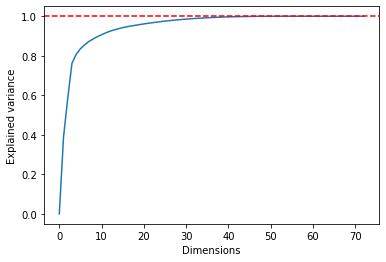

In [137]:
plot_variance(pipe_fifa['pca'])

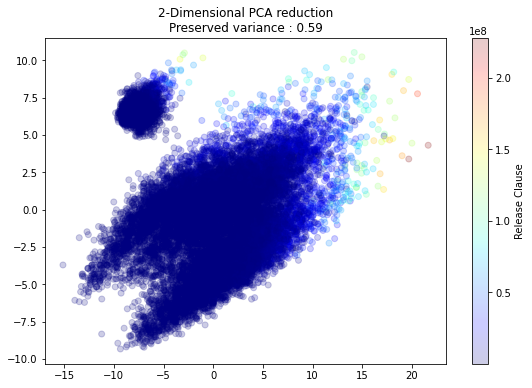

In [140]:
fifa_transformed = pipe_fifa.transform(X_fifa)
plot_reduction(fifa_transformed, pipe_fifa['pca'], 2, y_fifa, 'Release Clause')

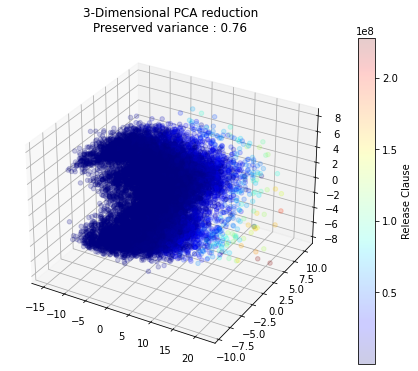

In [139]:
plot_reduction(fifa_transformed, pipe_fifa['pca'], 3, y_fifa, 'Release Clause')